<a href="https://colab.research.google.com/github/ziqiveronica/ADS-Audit-Assessing-Performance-and-Fairness-in-Comment-Toxicity-Classification/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
train_data = pd.read_csv('/content/drive/MyDrive/rds_project/rds_train.csv')

Mounted at /content/drive


In [ ]:
train_data

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.000000,0.021277,0.872340,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804869,6333967,0.000000,"Maybe the tax on ""things"" would be collected w...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,399385,approved,0,0,0,0,0,0.0,0,4
1804870,6333969,0.000000,What do you call people who STILL think the di...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,399528,approved,0,0,0,0,0,0.0,0,4
1804871,6333982,0.000000,"thank you ,,,right or wrong,,, i am following ...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,399457,approved,0,0,0,0,0,0.0,0,4
1804872,6334009,0.621212,Anyone who is quoted as having the following e...,0.030303,0.030303,0.045455,0.621212,0.0,NaN,NaN,...,399519,approved,0,0,0,0,0,0.0,0,66


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Display data types of each column
print("Data Types:")
train_data.info()

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804874 entries, 0 to 1804873
Data columns (total 45 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   id                                   int64  
 1   target                               float64
 2   comment_text                         object 
 3   severe_toxicity                      float64
 4   obscene                              float64
 5   identity_attack                      float64
 6   insult                               float64
 7   threat                               float64
 8   asian                                float64
 9   atheist                              float64
 10  bisexual                             float64
 11  black                                float64
 12  buddhist                             float64
 13  christian                            float64
 14  female                               float64
 15  heterosexual        

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(train_data.isnull().sum())


Missing Values:
id                                           0
target                                       0
comment_text                                 3
severe_toxicity                              0
obscene                                      0
identity_attack                              0
insult                                       0
threat                                       0
asian                                  1399744
atheist                                1399744
bisexual                               1399744
black                                  1399744
buddhist                               1399744
christian                              1399744
female                                 1399744
heterosexual                           1399744
hindu                                  1399744
homosexual_gay_or_lesbian              1399744
intellectual_or_learning_disability    1399744
jewish                                 1399744
latino                                 1399

In [ ]:
# Distribution of categorical data
print("\nValue Counts for categorical features:")
for column in train_data.select_dtypes(include=['object']).columns:
    print(f"\nDistribution in {column}:")
    print(train_data[column].value_counts())


Value Counts for categorical features:

Distribution in comment_text:
comment_text
Well said.                                                                                                                                                                                                                                                                184
No.                                                                                                                                                                                                                                                                       160
Exactly.                                                                                                                                                                                                                                                                  132
Yes.                                                                                                      

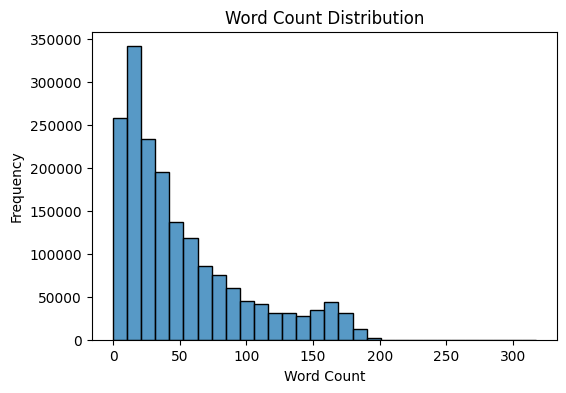

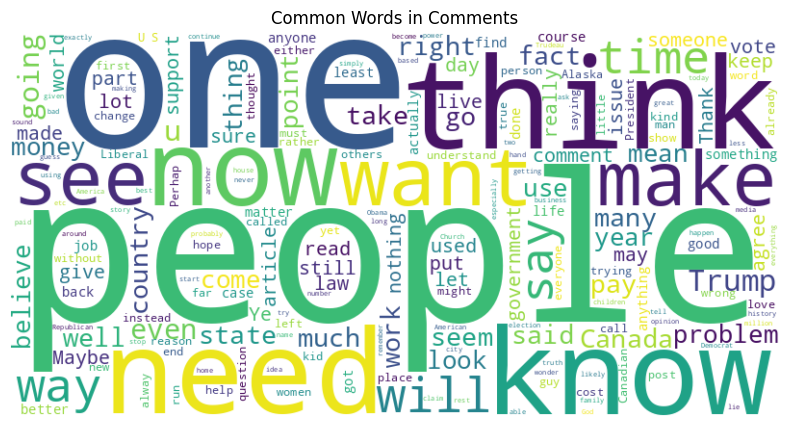

In [ ]:
from wordcloud import WordCloud
# Ensure all text data are strings
train_data['comment_text'] = train_data['comment_text'].fillna('').astype(str)

# Word count distribution
train_data['word_count'] = train_data['comment_text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(6, 4))
sns.histplot(train_data['word_count'], bins=30)
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


# Word cloud for overall toxicity comments
text = ' '.join(train_data['comment_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Comments')
plt.show()

In [ ]:
# Define low toxicity and high toxicity
low_toxicity = train_data[train_data['target'] < 0.5]['comment_text']
high_toxicity = train_data[train_data['target'] >= 0.5]['comment_text']

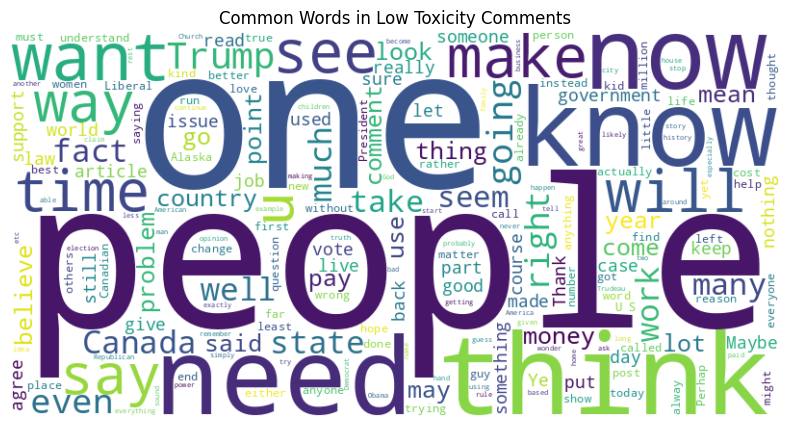

In [ ]:
# Word cloud for low toxicity comments
text = ' '.join(low_toxicity)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Low Toxicity Comments')
plt.show()

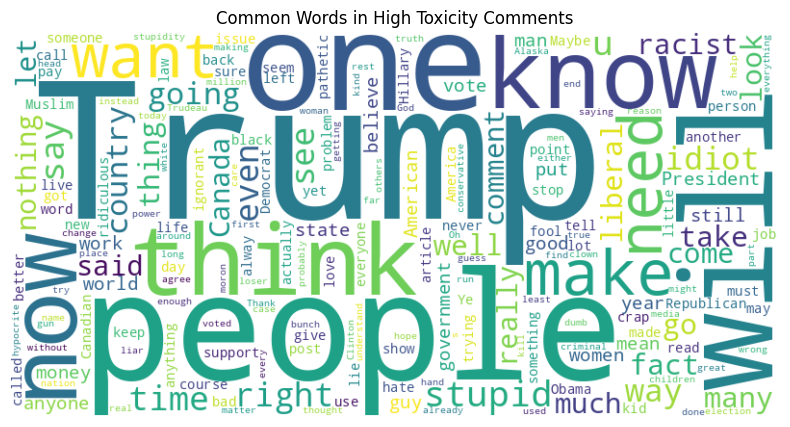

In [ ]:
# Word cloud for high toxicity comments
text = ' '.join(high_toxicity)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in High Toxicity Comments')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

high_toxicity_comments = train_data[train_data['target'] > 0.5]['comment_text']
vec = CountVectorizer(stop_words='english', max_features=100)
X = vec.fit_transform(high_toxicity_comments)
word_freq = dict(zip(vec.get_feature_names_out(), X.toarray().sum(axis=0)))
word_freq_sorted = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))

print("\nTop words in high toxicity comments:")
for word, freq in list(word_freq_sorted.items())[:10]:
    print(f"{word}: {freq}")


Top words in high toxicity comments:
trump: 24096
people: 19633
like: 18187
just: 17842
stupid: 13243
don: 12550
think: 8204
white: 8135
right: 7975
know: 7897


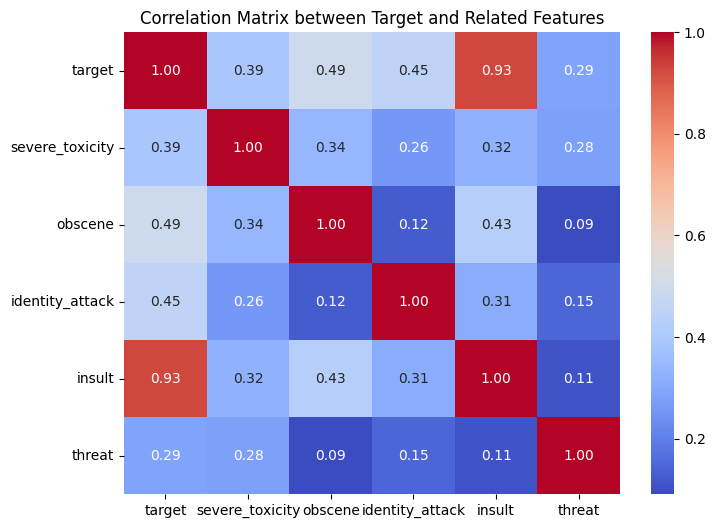

In [ ]:
# Examine relationships between 'target' and other numeric features
correlation_matrix = train_data[['target', 'severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix between Target and Related Features')
plt.show()

In [ ]:
df = train_data

Text(0, 0.5, 'Frequency')

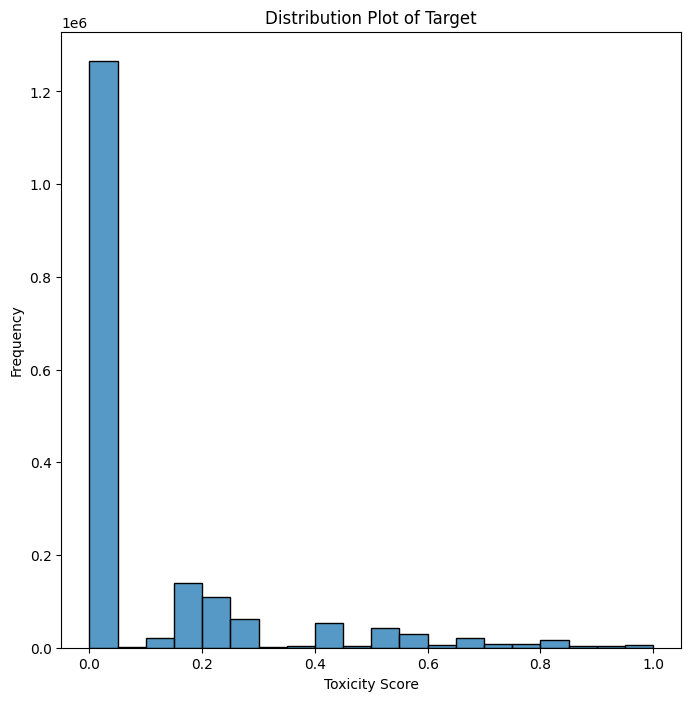

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 8))
sns.histplot(train_data['target'], bins=20, kde=False)
plt.title('Distribution Plot of Target')
plt.xlabel('Toxicity Score')
plt.ylabel('Frequency')

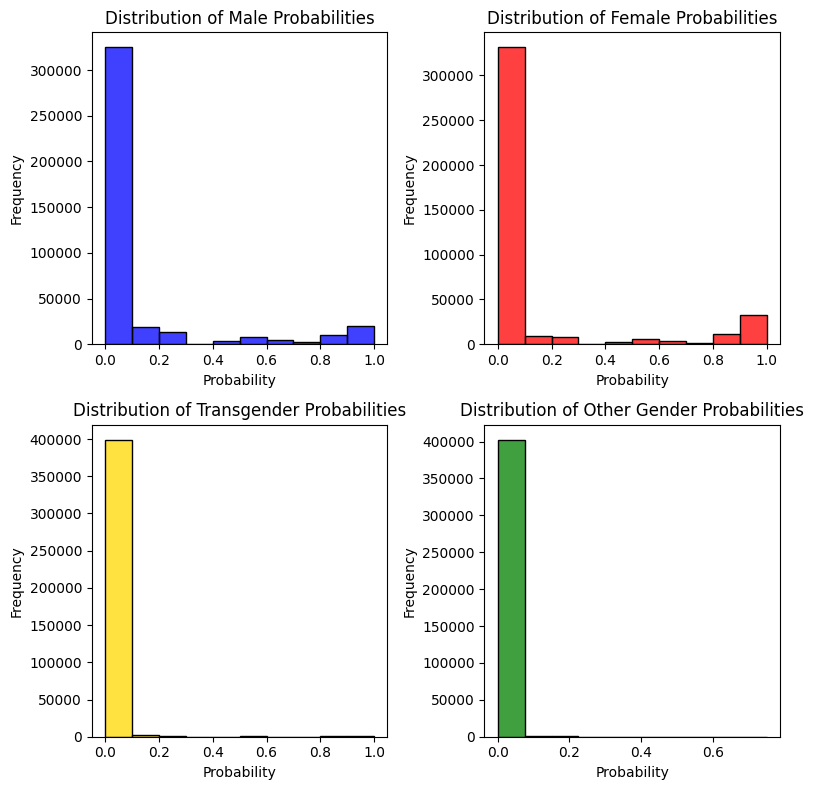

In [ ]:


plt.figure(figsize=(8, 8))

# Plotting the male probability distribution
plt.subplot(2, 2, 1)
sns.histplot(train_data['male'], bins=10, kde=False, color='blue')
plt.title('Distribution of Male Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')

# Plotting the female probability distribution
plt.subplot(2, 2, 2)
sns.histplot(train_data['female'], bins=10, kde=False, color='red')
plt.title('Distribution of Female Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
sns.histplot(train_data['transgender'], bins=10, kde=False, color='gold')
plt.title('Distribution of Transgender Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
sns.histplot(train_data['other_gender'], bins=10, kde=False, color='green')
plt.title('Distribution of Other Gender Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()

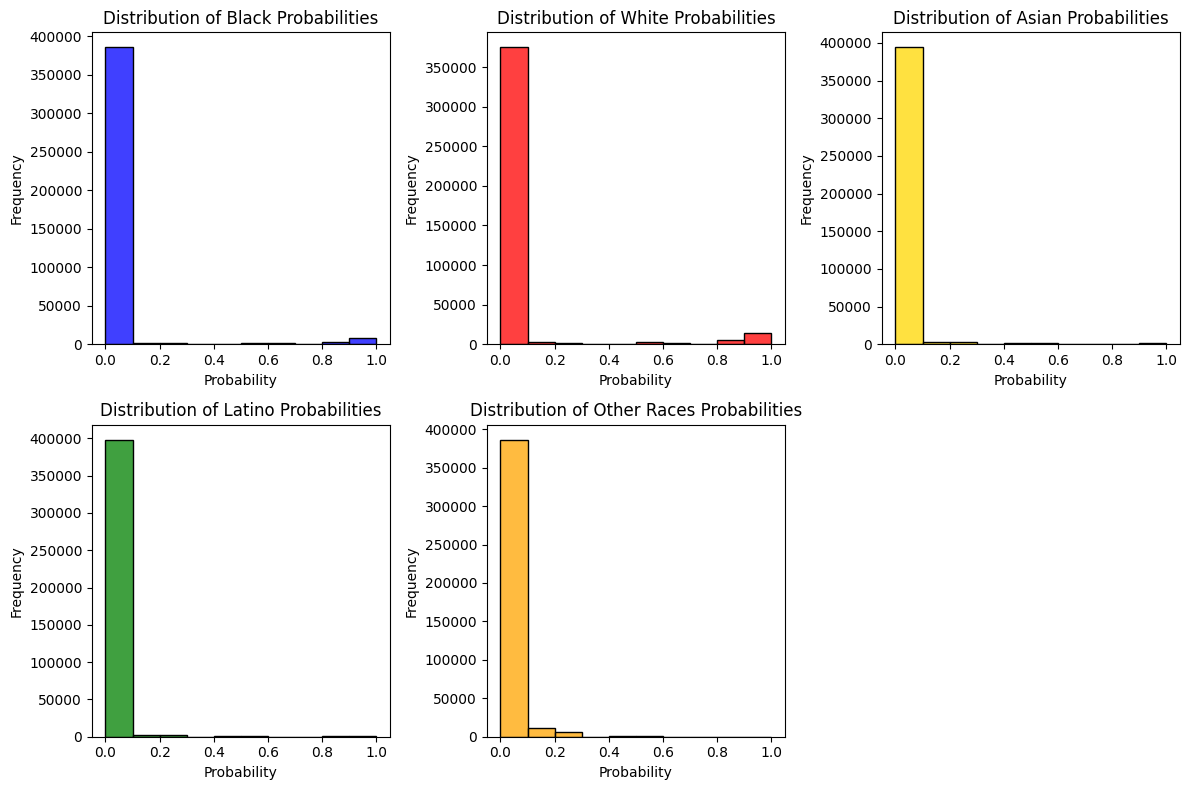

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
sns.histplot(train_data['black'], bins=10, kde=False, color='blue')
plt.title('Distribution of Black Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')

plt.subplot(2, 3, 2)
sns.histplot(train_data['white'], bins=10, kde=False, color='red')
plt.title('Distribution of White Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')

plt.subplot(2, 3, 3)
sns.histplot(train_data['asian'], bins=10, kde=False, color='gold')
plt.title('Distribution of Asian Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')

plt.subplot(2, 3, 4)
sns.histplot(train_data['latino'], bins=10, kde=False, color='green')
plt.title('Distribution of Latino Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')

plt.subplot(2, 3, 5)
sns.histplot(train_data['other_race_or_ethnicity'], bins=10, kde=False, color='orange')
plt.title('Distribution of Other Races Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()

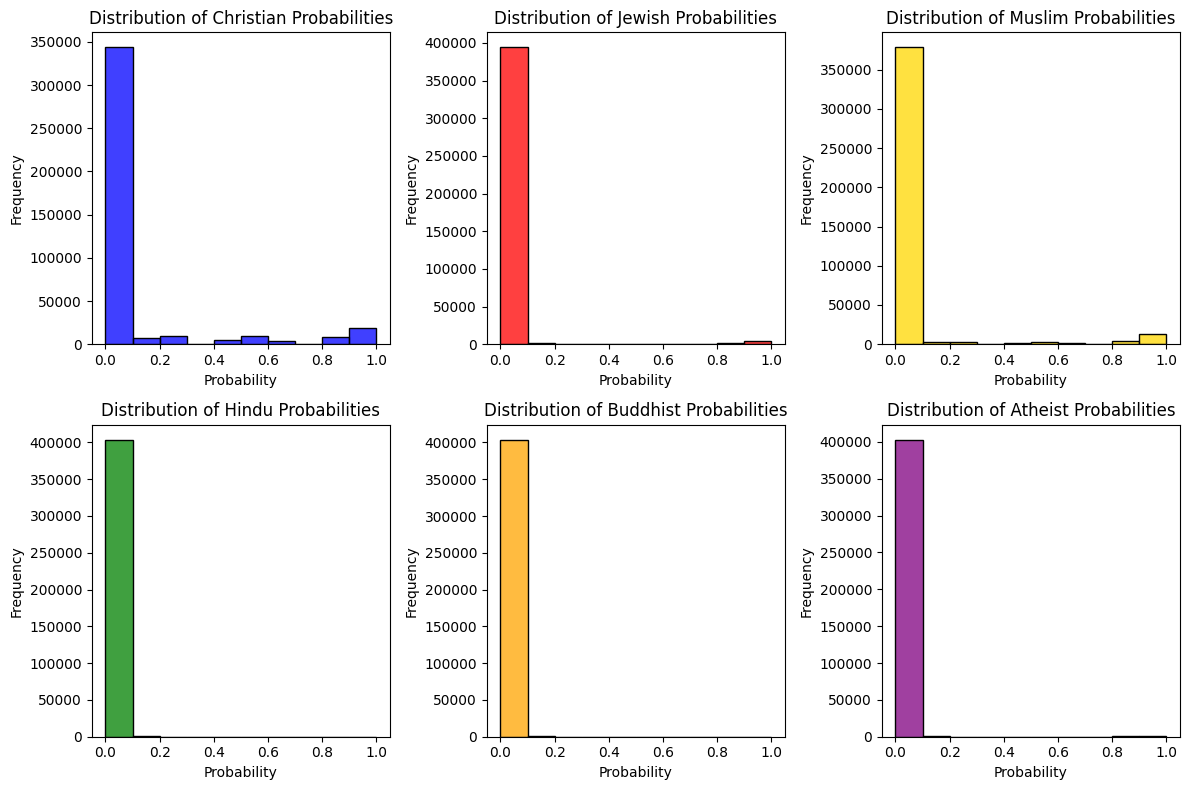

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
sns.histplot(train_data['christian'], bins=10, kde=False, color='blue')
plt.title('Distribution of Christian Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')

plt.subplot(2, 3, 2)
sns.histplot(train_data['jewish'], bins=10, kde=False, color='red')
plt.title('Distribution of Jewish Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')

plt.subplot(2, 3, 3)
sns.histplot(train_data['muslim'], bins=10, kde=False, color='gold')
plt.title('Distribution of Muslim Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')

plt.subplot(2, 3, 4)
sns.histplot(train_data['hindu'], bins=10, kde=False, color='green')
plt.title('Distribution of Hindu Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')

plt.subplot(2, 3, 5)
sns.histplot(train_data['buddhist'], bins=10, kde=False, color='orange')
plt.title('Distribution of Buddhist Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')

plt.subplot(2, 3, 6)
sns.histplot(train_data['atheist'], bins=10, kde=False, color='purple')
plt.title('Distribution of Atheist Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()

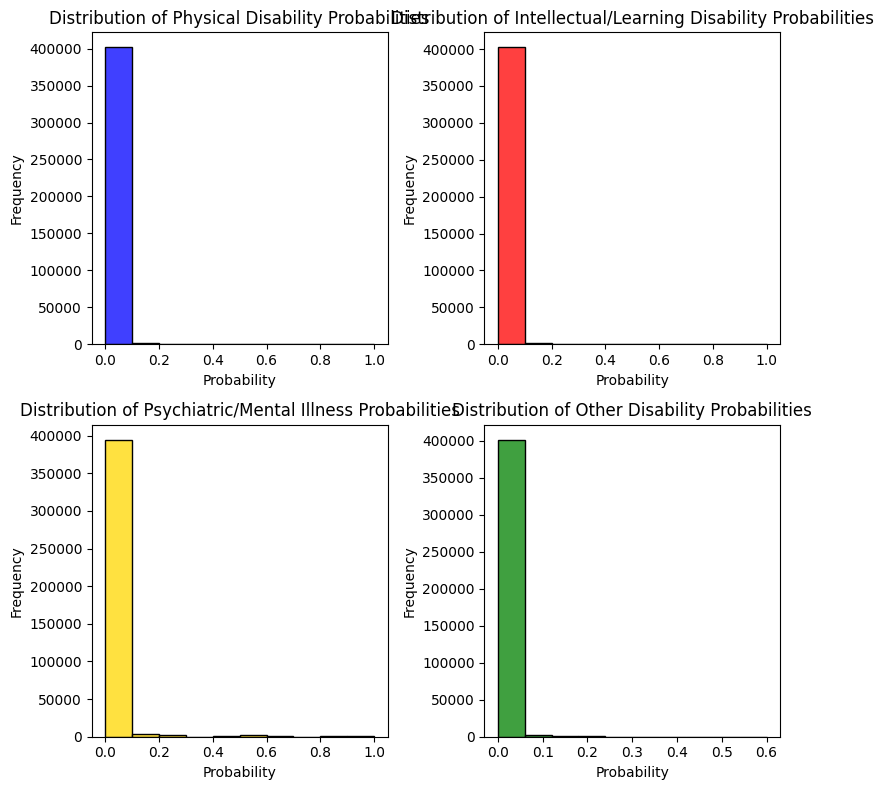

In [ ]:
plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
sns.histplot(train_data['physical_disability'], bins=10, kde=False, color='blue')
plt.title('Distribution of Physical Disability Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
sns.histplot(train_data['intellectual_or_learning_disability'], bins=10, kde=False, color='red')
plt.title('Distribution of Intellectual/Learning Disability Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
sns.histplot(train_data['psychiatric_or_mental_illness'], bins=10, kde=False, color='gold')
plt.title('Distribution of Psychiatric/Mental Illness Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
sns.histplot(train_data['other_disability'], bins=10, kde=False, color='green')
plt.title('Distribution of Other Disability Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()